In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('final_frame_pl_v4.csv', dtype={'Season': str})

In [3]:
data = data.iloc[:11199,:]

In [4]:
data['Goals_overall'] = data['FTHG'] + data['FTAG']

In [5]:
data_no_2425 = data.iloc[:11020, :]

In [6]:
goals_per_sn = data_no_2425.groupby('Season').agg({'Goals_overall':'sum'})
goals_per_sn['season'] = goals_per_sn.index
goals_per_sn = goals_per_sn[['season', 'Goals_overall']]
goals_per_sn['GPG_ratio'] = round(goals_per_sn['Goals_overall']/380, 2)

In [7]:
order = ['9596', '9697', '9798', '9899', '9900', '0001', '0102', '0203', '0304', '0405', '0506', '0607', '0708',
       '0809', '0910', '1011', '1112', '1213', '1314', '1415', '1516',
       '1617', '1718', '1819', '1920', '2021', '2122', '2223', '2324']

goals_per_sn['season'] = pd.Categorical(goals_per_sn['season'], categories=order, ordered=True)
goals_per_sn = goals_per_sn.sort_values('season')

In [8]:
goals_per_sn

season  Goals_overall  GPG_ratio
Season                                 
9596     9596          988.0       2.60
9697     9697          970.0       2.55
9798     9798         1019.0       2.68
9899     9899          959.0       2.52
9900     9900         1060.0       2.79
0001     0001          992.0       2.61
0102     0102         1001.0       2.63
0203     0203         1000.0       2.63
0304     0304         1012.0       2.66
0405     0405          975.0       2.57
0506     0506          944.0       2.48
0607     0607          931.0       2.45
0708     0708         1002.0       2.64
0809     0809          942.0       2.48
0910     0910         1053.0       2.77
1011     1011         1063.0       2.80
1112     1112         1066.0       2.81
1213     1213         1063.0       2.80
1314     1314         1052.0       2.77
1415     1415          975.0       2.57
1516     1516         1026.0       2.70
1617     1617         1064.0       2.80
1718     1718         1018.0       2.68
1819     1819         1072.0       2.82
1920     1920         1034.0       2.72
2021     2021         1024.0       2.69
2122     2122         1071.0       2.82
2223     2223         1084.0       2.85
2324     2324         1246.0       3.28

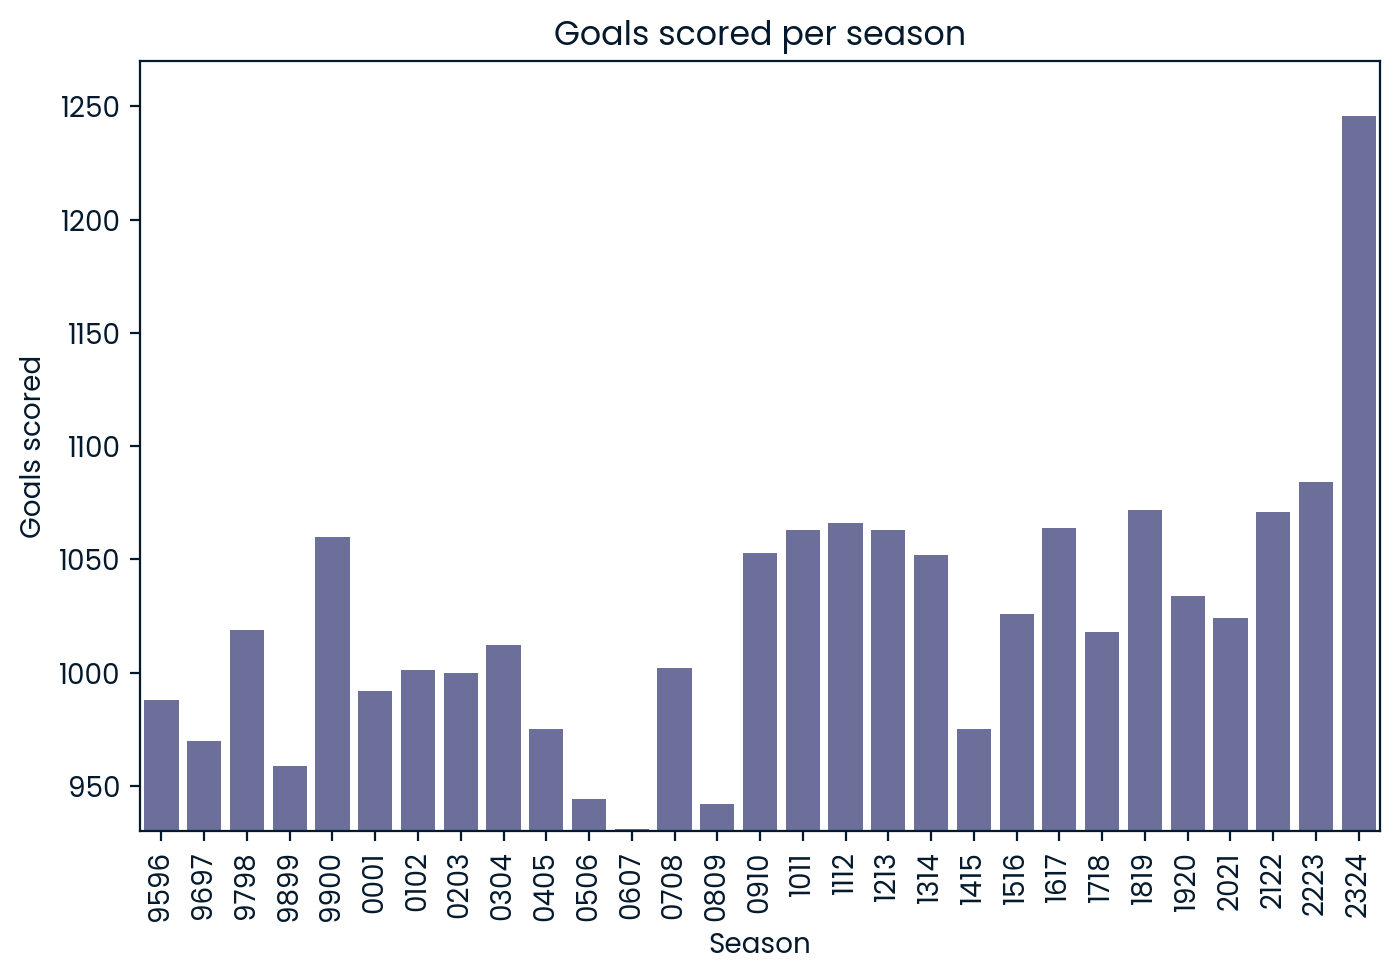

In [9]:
plt.figure(figsize=(8, 5))  

sns.barplot(x='season', y='Goals_overall', data=goals_per_sn)

plt.ylim(930, 1270)

plt.xticks(rotation=90)

plt.title('Goals scored per season')
plt.xlabel('Season')
plt.ylabel('Goals scored')

plt.show()
plt.close()

In [10]:
draws = data_no_2425[data_no_2425['FTR'] == 'D'].groupby('Season')['Index'].count().to_frame()
draws['season'] = draws.index
draws = draws[['season', 'Index']]
draws['season'] = pd.Categorical(draws['season'], categories=order, ordered=True)
draws = draws.sort_values('season')
draws.columns = ['season', 'No_draws']

In [11]:
draws

season  No_draws
Season                 
9596     9596        98
9697     9697       119
9798     9798        95
9899     9899       115
9900     9900        92
0001     0001       101
0102     0102       101
0203     0203        90
0304     0304       108
0405     0405       110
0506     0506        77
0607     0607        98
0708     0708       100
0809     0809        97
0910     0910        96
1011     1011       111
1112     1112        93
1213     1213       108
1314     1314        78
1415     1415        93
1516     1516       107
1617     1617        84
1718     1718        99
1819     1819        71
1920     1920        92
2021     2021        83
2122     2122        88
2223     2223        87
2324     2324        82

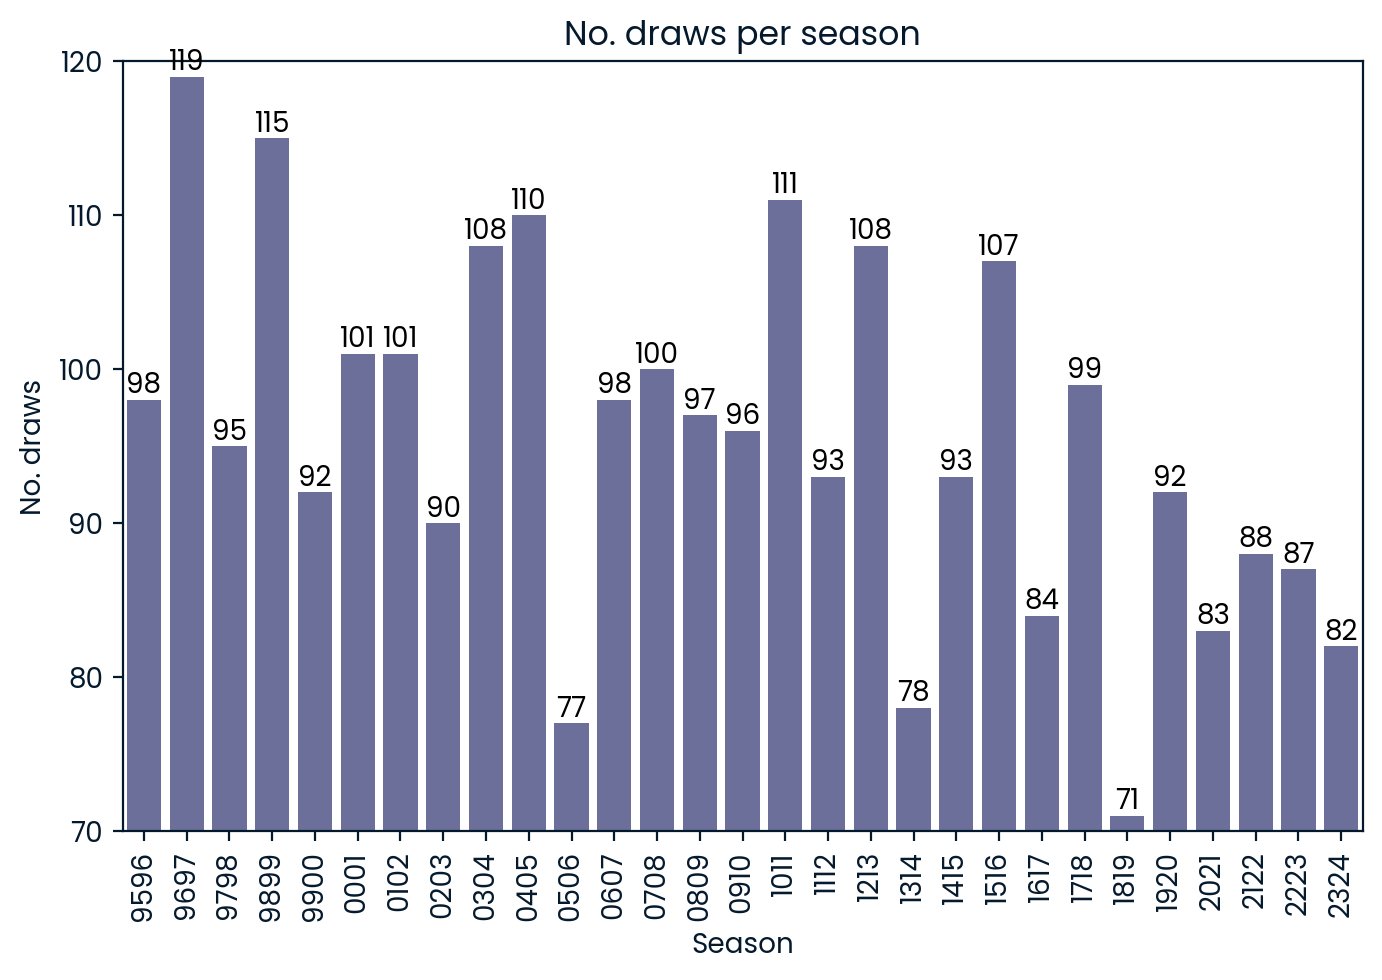

In [12]:
plt.figure(figsize=(8, 5))  

ax = sns.barplot(x='season', y='No_draws', data=draws)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(70, 120)

plt.xticks(rotation=90)

plt.title('No. draws per season')
plt.xlabel('Season')
plt.ylabel('No. draws')

plt.show()
plt.close()

In [13]:
data_no_2425['Result'] = data_no_2425['FTHG'].astype(int).astype(str) + ' - ' + data_no_2425['FTAG'].astype(int).astype(str)

In [14]:
results = data_no_2425.groupby('Result')['Result'].value_counts().to_frame()
results

count
Result       
0 - 0     857
0 - 1     805
0 - 2     495
0 - 3     251
0 - 4     110
0 - 5      32
0 - 6      12
0 - 7       1
0 - 8       1
0 - 9       1
1 - 0    1156
1 - 1    1235
1 - 2     684
1 - 3     310
1 - 4     109
1 - 5      27
1 - 6      11
1 - 7       1
1 - 8       1
2 - 0     903
2 - 1     959
2 - 2     553
2 - 3     205
2 - 4      51
2 - 5      16
2 - 6       5
3 - 0     462
3 - 1     505
3 - 2     241
3 - 3     111
3 - 4      28
3 - 5       4
3 - 6       2
4 - 0     214
4 - 1     190
4 - 2      96
4 - 3      55
4 - 4      16
4 - 5       2
5 - 0      97
5 - 1      64
5 - 2      24
5 - 3      13
5 - 4       3
5 - 5       1
6 - 0      23
6 - 1      26
6 - 2      11
6 - 3       5
6 - 4       1
7 - 0       9
7 - 1       9
7 - 2       5
7 - 3       1
7 - 4       1
8 - 0       5
8 - 1       1
8 - 2       1
9 - 0       2
9 - 1       1

In [15]:
results['Result'] = results.index 
results['Result_label'] = results.apply(lambda row: "Other" if row['count'] < 20 else str(row['Result']), axis=1)

results = results[['Result', 'count', 'Result_label']]
result = results.groupby('Result_label')['count'].sum().to_frame()

result = result.sort_values('count')
result

count
Result_label       
6 - 0            23
5 - 2            24
6 - 1            26
1 - 5            27
3 - 4            28
0 - 5            32
2 - 4            51
4 - 3            55
5 - 1            64
4 - 2            96
5 - 0            97
1 - 4           109
0 - 4           110
3 - 3           111
Other           142
4 - 1           190
2 - 3           205
4 - 0           214
3 - 2           241
0 - 3           251
1 - 3           310
3 - 0           462
0 - 2           495
3 - 1           505
2 - 2           553
1 - 2           684
0 - 1           805
0 - 0           857
2 - 0           903
2 - 1           959
1 - 0          1156
1 - 1          1235

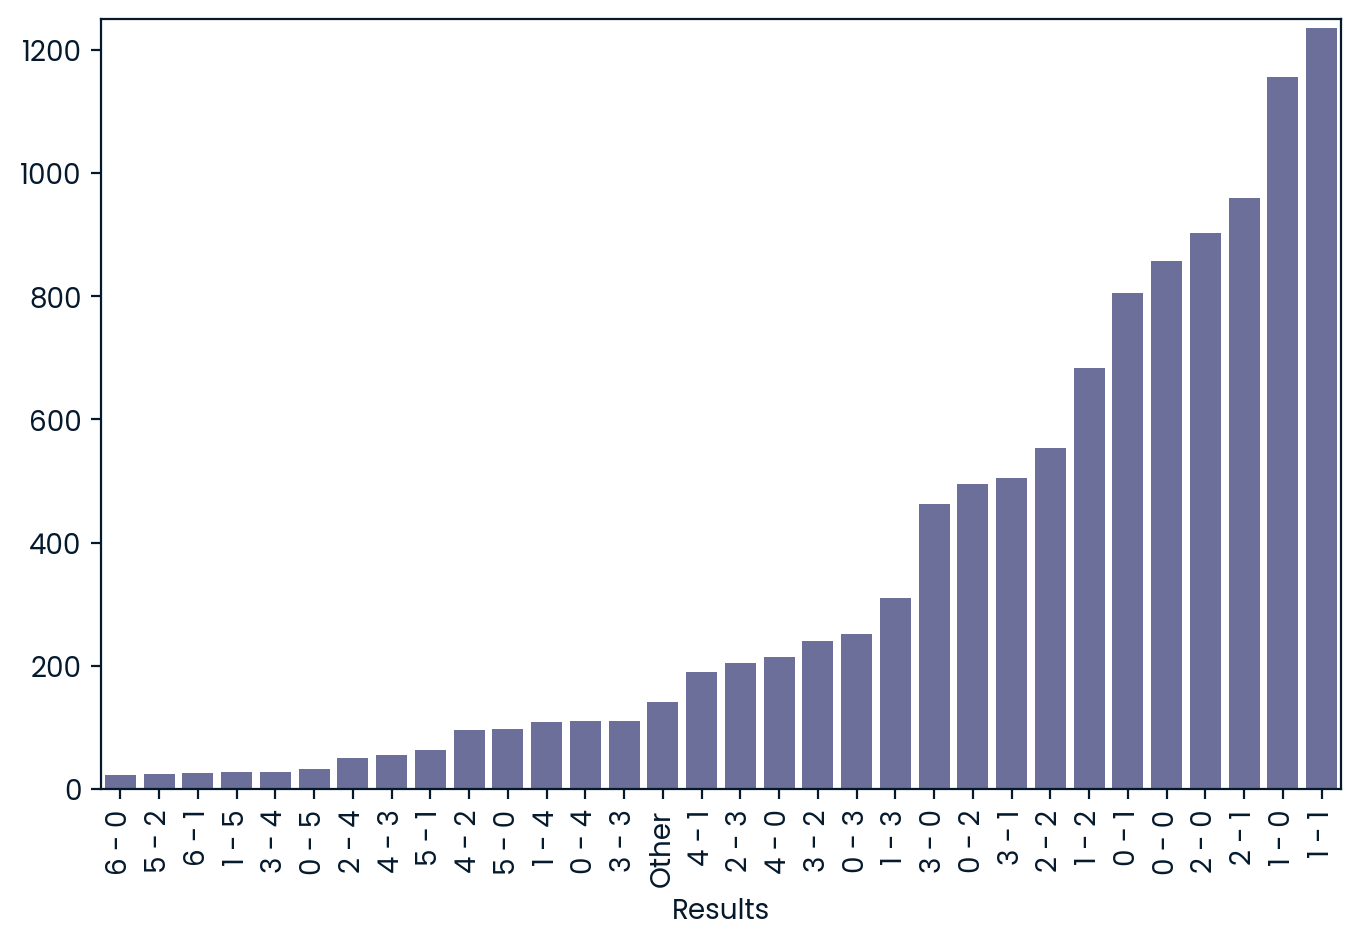

In [16]:
plt.figure(figsize=(8, 5))  

sns.barplot(x=result.index, y='count', data=result)

plt.ylim(0, 1250)

plt.xticks(rotation=90)

#plt.yscale('log')

#plt.title('No. draws per season')
plt.xlabel('Results')
plt.ylabel('')

plt.show()
plt.close()

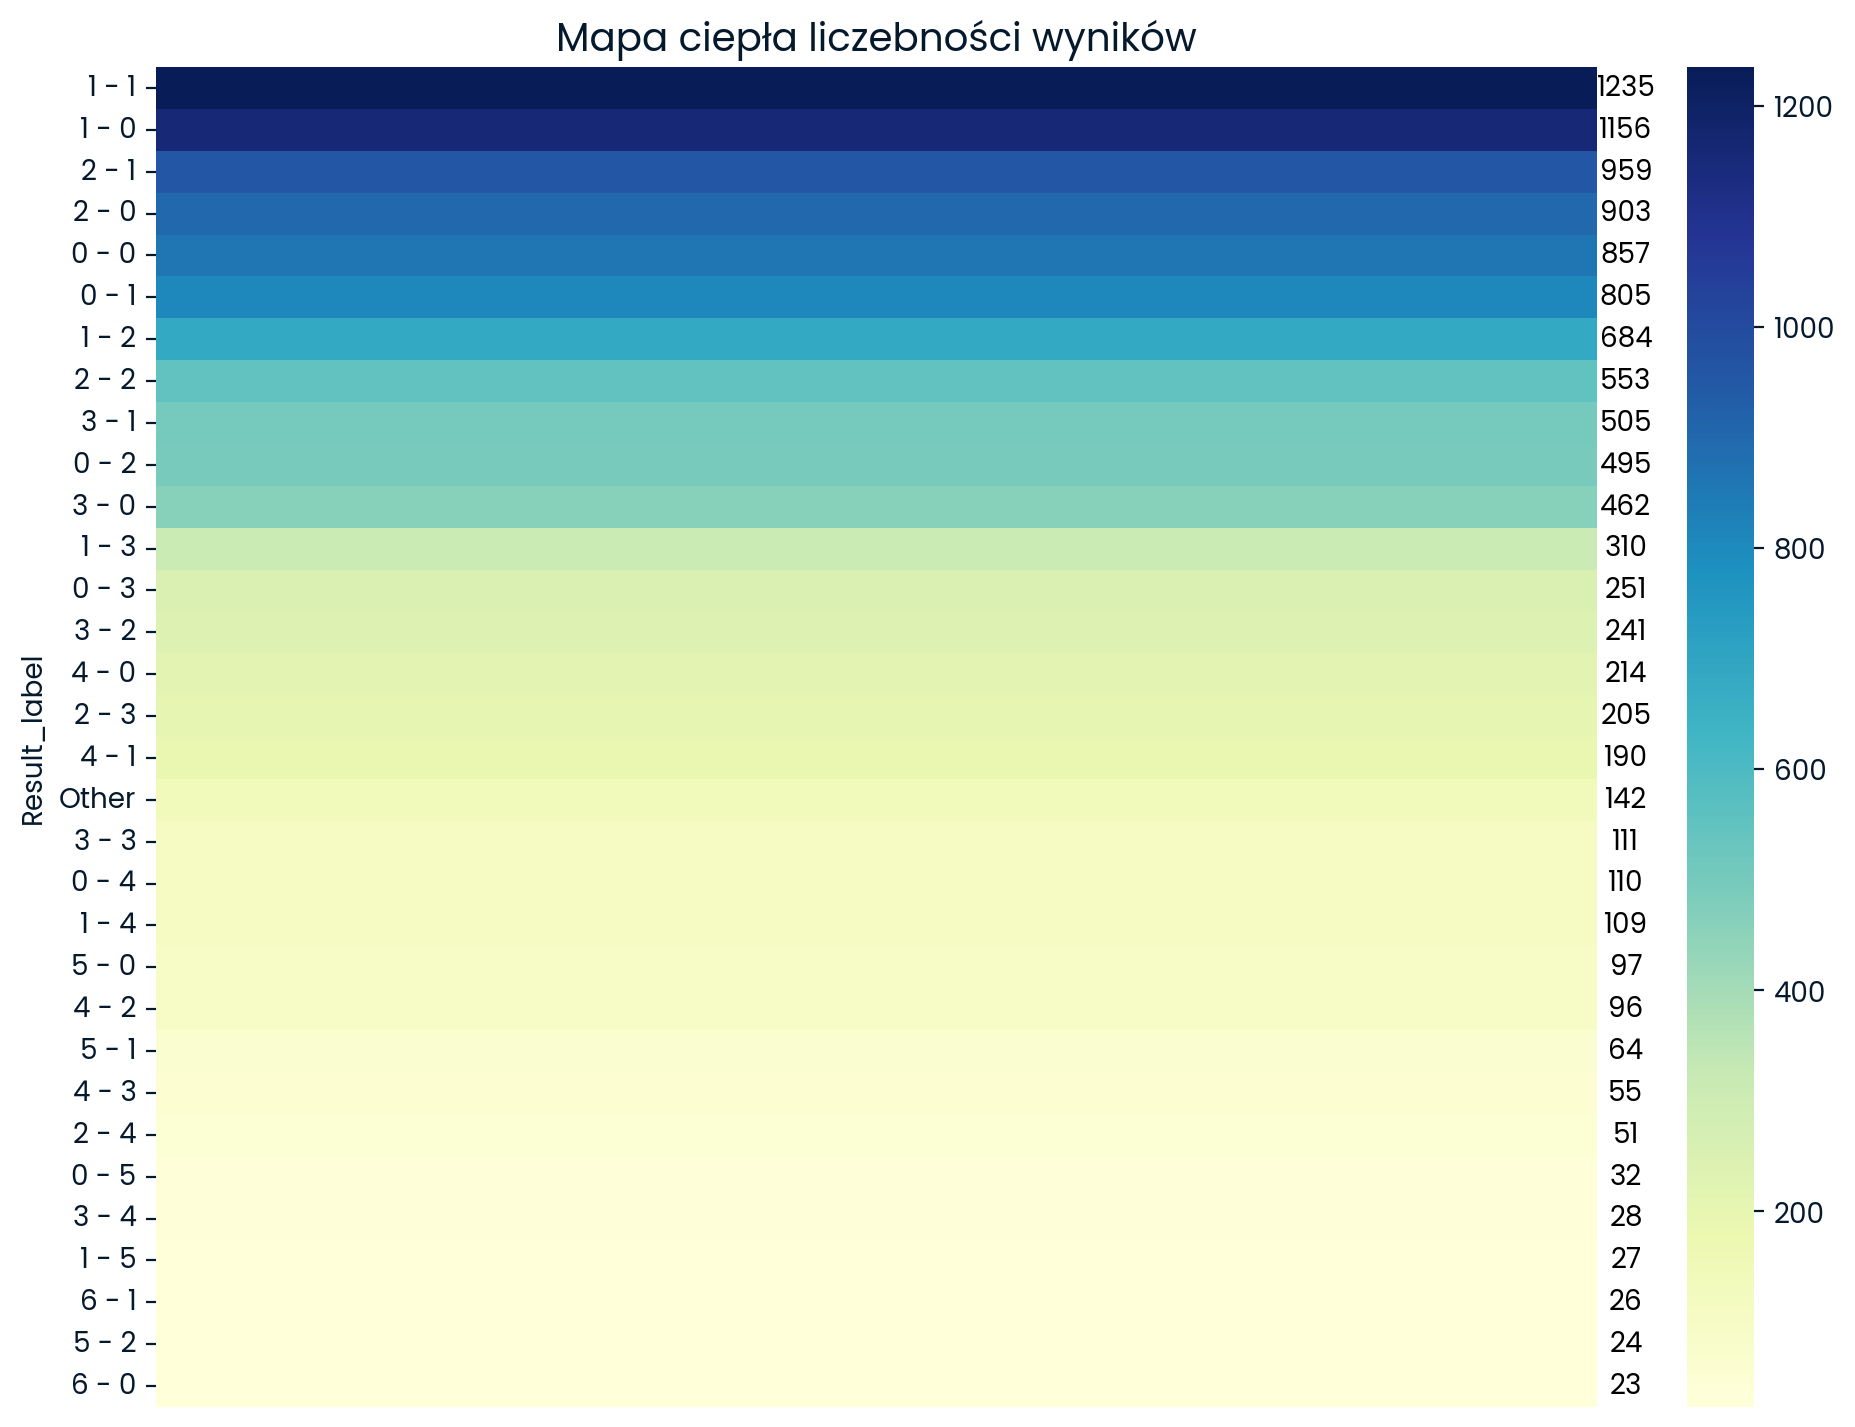

In [17]:
pivot_result = result.pivot_table(index='Result_label', values='count')

pivot_result = pivot_result.sort_values('count', ascending=False)

plt.figure(figsize=(10, 7))  

ax = sns.heatmap(pivot_result, annot=True, cmap='YlGnBu', fmt='.0f', cbar=True)

for text in ax.texts:
    text.set_position((text.get_position()[0] + 0.52, text.get_position()[1]))
    text.set_color('black')

plt.xticks([])

plt.yticks(rotation=0, fontsize=10)  

plt.tight_layout()

plt.title('Mapa ciepła liczebności wyników', fontsize=14)
plt.show()
plt.close()

In [18]:
data_no_2425['HomeWin'] = (data_no_2425['FTR'] == 'H')
data_no_2425['AwayWin'] = (data_no_2425['FTR'] == 'A')
data_no_2425['Draw'] = (data_no_2425['FTR'] == 'D')

df_home = data_no_2425[['HomeTeam', 'HomeWin', 'AwayWin', 'Draw']].rename(columns={'HomeTeam': 'Team'})
df_away = data_no_2425[['AwayTeam', 'HomeWin', 'AwayWin', 'Draw']].rename(columns={'AwayTeam': 'Team'})

table_home = df_home.groupby('Team').agg(
    Wins=('HomeWin', 'sum'),
    Draws=('Draw', 'sum'),
    Losses=('AwayWin','sum')
).reset_index()

table_away = df_away.groupby('Team').agg(
    Wins=('AwayWin', 'sum'),
    Draws=('Draw', 'sum'),
    Losses=('HomeWin','sum')
).reset_index()

table_all = pd.concat([table_home, table_away])
table_all.loc[table_all['Team'] == 'Middlesboro', 'Team'] = 'Middlesbrough'

In [19]:
table_home

Team  Wins  Draws  Losses
0            Arsenal   373    113      65
1        Aston Villa   205    138     151
2           Barnsley     7      4       8
3         Birmingham    50     46      37
4          Blackburn   125     74      86
5          Blackpool     5      5       9
6             Bolton    93     75      79
7        Bournemouth    47     35      51
8           Bradford    10     15      13
9          Brentford    22     17      18
10          Brighton    45     46      42
11           Burnley    54     42      75
12           Cardiff    11      7      20
13          Charlton    58     40      54
14           Chelsea   344    135      72
15          Coventry    42     38      34
16    Crystal Palace    80     60     107
17             Derby    48     35      50
18           Everton   258    142     151
19            Fulham   137     70     116
20      Huddersfield     8      8      22
21              Hull    29     24      42
22           Ipswich    17      9      12
23             Leeds    97     59      72
24         Leicester   125     82      97
25         Liverpool   353    132      66
26             Luton     4      4      11
27          Man City   290     78      88
28        Man United   383    101      67
29       Middlesboro    10      7       2
30     Middlesbrough    92     72      83
31         Newcastle   248    128     137
32           Norwich    41     35      57
33     Nott'm Forest    30     33      32
34        Portsmouth    54     34      45
35               QPR    21     23      32
36           Reading    23     12      22
37  Sheffield United    24     14      38
38    Sheffield Weds    37     28      30
39       Southampton   153    112     134
40             Stoke    81     54      55
41        Sunderland    98     87     119
42           Swansea    51     37      45
43         Tottenham   311    115     125
44           Watford    45     40      67
45         West Brom    76     66     105
46          West Ham   216    123     155
47             Wigan    48     45      59
48         Wimbledon    32     32      31
49            Wolves    72     42      76

In [20]:
table_away

Team  Wins  Draws  Losses
0            Arsenal   254    142     155
1        Aston Villa   140    135     219
2           Barnsley     3      1      15
3         Birmingham    23     36      74
4          Blackburn    65     82     138
5          Blackpool     5      4      10
6             Bolton    56     53     138
7        Bournemouth    33     23      77
8           Bradford     4      5      29
9          Brentford    16     13      28
10          Brighton    33     39      61
11           Burnley    34     43      94
12           Cardiff     6      6      26
13          Charlton    35     42      75
14           Chelsea   263    128     160
15          Coventry    18     33      63
16    Crystal Palace    67     63     117
17             Derby    20     35      78
18           Everton   143    166     242
19            Fulham    53     99     171
20      Huddersfield     4      9      25
21              Hull    12     24      59
22           Ipswich    12      6      20
23             Leeds    76     48     104
24         Leicester    87     74     143
25         Liverpool   245    139     167
26             Luton     2      4      13
27          Man City   203    101     152
28        Man United   284    135     132
29       Middlesboro     3      3      13
30     Middlesbrough    49     76     122
31         Newcastle   128    136     249
32           Norwich    15     31      87
33     Nott'm Forest    16     25      54
34        Portsmouth    25     31      77
35               QPR    10      9      57
36           Reading     9     11      37
37  Sheffield United    10     15      51
38    Sheffield Weds    20     19      56
39       Southampton    90    100     209
40             Stoke    35     55     100
41        Sunderland    55     72     177
42           Swansea    31     29      73
43         Tottenham   186    141     224
44           Watford    28     26      98
45         West Brom    41     73     133
46          West Ham   118    123     253
47             Wigan    37     31      84
48         Wimbledon    20     28      47
49            Wolves    42     51      97

In [21]:
table_all = table_all.groupby('Team').agg(
    Wins=('Wins', 'sum'),
    Draws=('Draws', 'sum'),
    Losses=('Losses','sum')
).reset_index()
table_all['Points'] = (table_all['Wins'] * 3) + (table_all['Draws'] * 1)

In [22]:
table_all

Team  Wins  Draws  Losses  Points
0            Arsenal   627    255     220    2136
1        Aston Villa   345    273     370    1308
2           Barnsley    10      5      23      35
3         Birmingham    73     82     111     301
4          Blackburn   190    156     224     726
5          Blackpool    10      9      19      39
6             Bolton   149    128     217     575
7        Bournemouth    80     58     128     298
8           Bradford    14     20      42      62
9          Brentford    38     30      46     144
10          Brighton    78     85     103     319
11           Burnley    88     85     169     349
12           Cardiff    17     13      46      64
13          Charlton    93     82     129     361
14           Chelsea   607    263     232    2084
15          Coventry    60     71      97     251
16    Crystal Palace   147    123     224     564
17             Derby    68     70     128     274
18           Everton   401    308     393    1511
19            Fulham   190    169     287     739
20      Huddersfield    12     17      47      53
21              Hull    41     48     101     171
22           Ipswich    29     15      32     102
23             Leeds   173    107     176     626
24         Leicester   212    156     240     792
25         Liverpool   598    271     233    2065
26             Luton     6      8      24      26
27          Man City   493    179     240    1658
28        Man United   667    236     199    2237
29     Middlesbrough   154    158     220     620
30         Newcastle   376    264     386    1392
31           Norwich    56     66     144     234
32     Nott'm Forest    46     58      86     196
33        Portsmouth    79     65     122     302
34               QPR    31     32      89     125
35           Reading    32     23      59     119
36  Sheffield United    34     29      89     131
37    Sheffield Weds    57     47      86     218
38       Southampton   243    212     343     941
39             Stoke   116    109     155     457
40        Sunderland   153    159     296     618
41           Swansea    82     66     118     312
42         Tottenham   497    256     349    1747
43           Watford    73     66     165     285
44         West Brom   117    139     238     490
45          West Ham   334    246     408    1248
46             Wigan    85     76     143     331
47         Wimbledon    52     60      78     216
48            Wolves   114     93     173     435

In [23]:
dfs_by_season = {season: df_season for season, df_season in data_no_2425.groupby('Season')}

In [24]:
def points_after(df):   
        team_points = {team: 0 for team in pd.unique(df[['HomeTeam', 'AwayTeam']].values.ravel())}
        home_curpts = []
        away_curpts = []

        for _, row in df.iterrows():
            home_team = row['HomeTeam']
            away_team = row['AwayTeam']
            result = row['FTR']

            if result == 'H':
                team_points[home_team] += 3
            elif result == 'A':
                team_points[away_team] += 3
            elif result == 'D':
                team_points[home_team] += 1
                team_points[away_team] += 1

            home_curpts.append(team_points[home_team])
            away_curpts.append(team_points[away_team])
        
        df['HomeTeam_ptsaft'] = home_curpts
        df['AwayTeam_ptsaft'] = away_curpts
        
        return df

In [25]:
def season_final_table(df):

    last_appearance_h = df.drop_duplicates(subset='HomeTeam', keep='last')
    last_appearance_a = df.drop_duplicates(subset='AwayTeam', keep='last')

    last_appearance_home = last_appearance_h.rename(columns={'HomeTeam': 'Team'})[['Team', 'HomeTeam_ptsaft', 'Index']]
    last_appearance_away = last_appearance_a.rename(columns={'AwayTeam': 'Team'})[['Team', 'AwayTeam_ptsaft', 'Index']]

    last_appearance_home = last_appearance_home.rename(columns={'HomeTeam_ptsaft': 'Team_ptsaft'})
    last_appearance_away = last_appearance_away.rename(columns={'AwayTeam_ptsaft': 'Team_ptsaft'})

    last_appearance = pd.concat([last_appearance_home, last_appearance_away])

    last_appearance_final = last_appearance.loc[last_appearance.groupby('Team')['Index'].idxmax()]

    last_appearance_final = last_appearance_final.drop_duplicates().sort_values(by='Team_ptsaft', ascending=False)

    final_table = last_appearance_final[['Team', 'Team_ptsaft']].reset_index(drop=True)

    return final_table

In [26]:
final_season_tables = {}

for key, value in dfs_by_season.items():
    dfs_by_season[key] = points_after(value)
    final_season_tables[key] = season_final_table(value)
    
df_all = pd.concat(dfs_by_season.values(), ignore_index=True)

In [27]:
sn_champs = {}
sn_champ_pts = {}
sn_champ_v_last_pts_diff = {}
sn_last_team_pts = {}

for key in order:
    sn_champs[key] = final_season_tables[key].iloc[0,:]['Team']
    sn_champ_pts[key] = final_season_tables[key].iloc[0,:]['Team_ptsaft']
    sn_champ_v_last_pts_diff[key] = final_season_tables[key].iloc[0,:]['Team_ptsaft'] - final_season_tables[key].iloc[-1,:]['Team_ptsaft']
    sn_last_team_pts[key] = final_season_tables[key].iloc[-1,:]['Team_ptsaft']

In [28]:
sn_champs

{'9596': 'Man United',
 '9697': 'Man United',
 '9798': 'Arsenal',
 '9899': 'Man United',
 '9900': 'Man United',
 '0001': 'Man United',
 '0102': 'Arsenal',
 '0203': 'Man United',
 '0304': 'Arsenal',
 '0405': 'Chelsea',
 '0506': 'Chelsea',
 '0607': 'Man United',
 '0708': 'Man United',
 '0809': 'Man United',
 '0910': 'Chelsea',
 '1011': 'Man United',
 '1112': 'Man United',
 '1213': 'Man United',
 '1314': 'Man City',
 '1415': 'Chelsea',
 '1516': 'Leicester',
 '1617': 'Chelsea',
 '1718': 'Man City',
 '1819': 'Man City',
 '1920': 'Liverpool',
 '2021': 'Man City',
 '2122': 'Man City',
 '2223': 'Man City',
 '2324': 'Man City'}

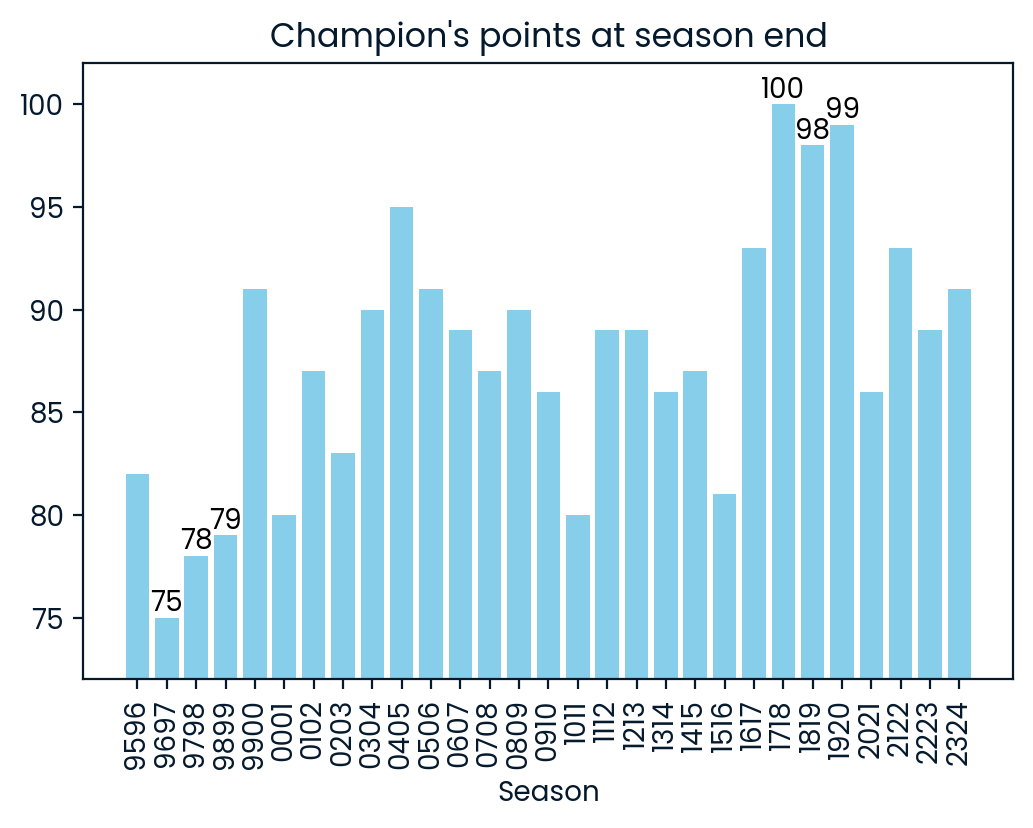

In [29]:
plt.figure(figsize=(6, 4))
bars = plt.bar(sn_champ_pts.keys(), sn_champ_pts.values(), color='skyblue')

ax = plt.gca()

sorted_bars = sorted(bars, key=lambda bar: bar.get_height())

bars_to_annotate = sorted_bars[:3] + sorted_bars[-3:]

for bar in bars_to_annotate:
    ax.annotate(f'{int(bar.get_height())}', 
                (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(72, 102)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("")
plt.title("Champion's points at season end")

plt.show()
plt.close()

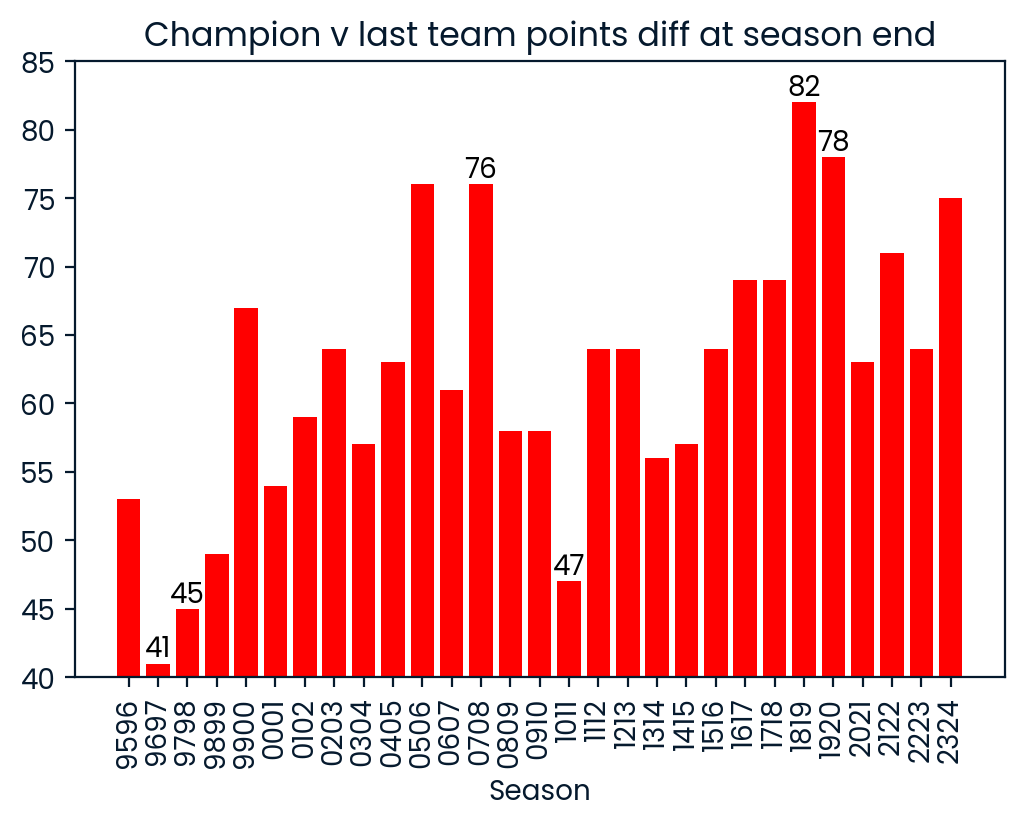

In [30]:
plt.figure(figsize=(6, 4))
bars = plt.bar(sn_champ_v_last_pts_diff.keys(), sn_champ_v_last_pts_diff.values(), color='red')

ax = plt.gca()

sorted_bars = sorted(bars, key=lambda bar: bar.get_height())

bars_to_annotate = sorted_bars[:3] + sorted_bars[-3:]

for bar in bars_to_annotate:
    ax.annotate(f'{int(bar.get_height())}', 
                (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(40, 85)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("")
plt.title("Champion v last team points diff at season end")

plt.show()
plt.close()

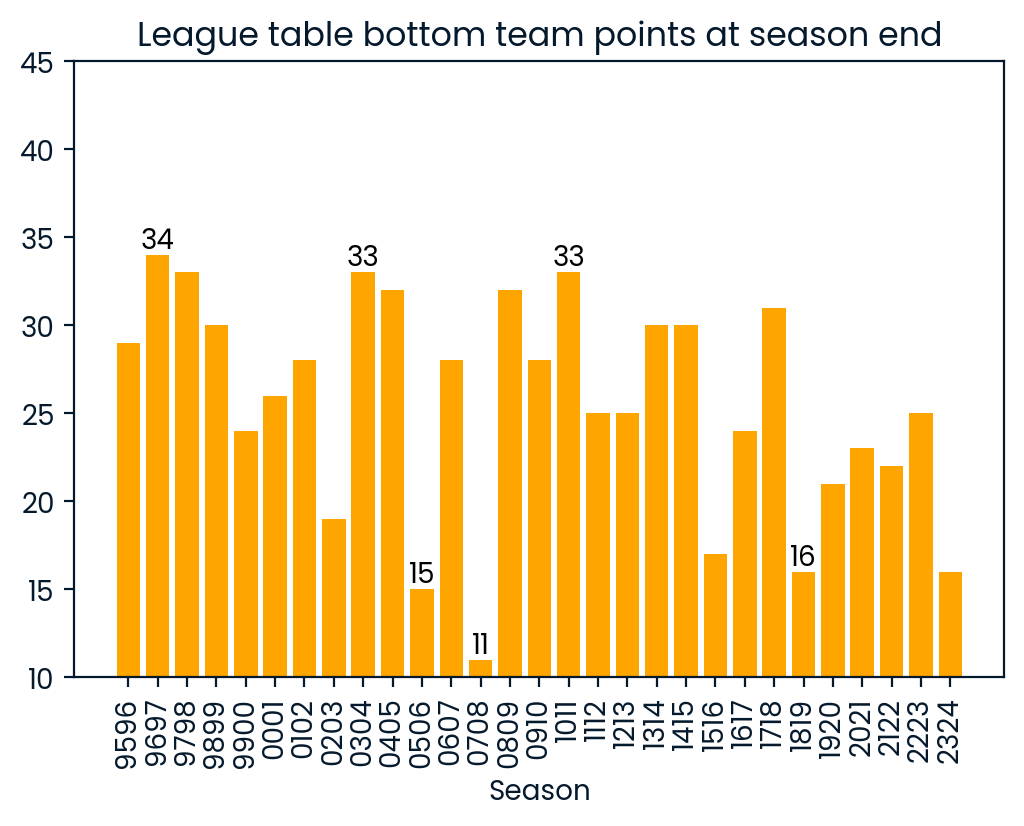

In [31]:
plt.figure(figsize=(6, 4))
bars = plt.bar(sn_last_team_pts.keys(), sn_last_team_pts.values(), color='orange')

ax = plt.gca()

sorted_bars = sorted(bars, key=lambda bar: bar.get_height())

bars_to_annotate = sorted_bars[:3] + sorted_bars[-3:]

for bar in bars_to_annotate:
    ax.annotate(f'{int(bar.get_height())}', 
                (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(10, 45)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("")
plt.title("League table bottom team points at season end")

plt.show()
plt.close()

In [32]:
def winslosesdraws_cum(df):   
        team_wins = {team: 0 for team in pd.unique(df[['HomeTeam', 'AwayTeam']].values.ravel())}
        team_loses = {team: 0 for team in pd.unique(df[['HomeTeam', 'AwayTeam']].values.ravel())}
        team_draws = {team: 0 for team in pd.unique(df[['HomeTeam', 'AwayTeam']].values.ravel())}
        home_curwins = []
        away_curwins = []
        home_curloses = []
        away_curloses = []
        home_curdraws = []
        away_curdraws = []

        for _, row in df.iterrows():
            home_team = row['HomeTeam']
            away_team = row['AwayTeam']
            result = row['FTR']

            if result == 'H':
                team_wins[home_team] += 1
                team_loses[away_team] += 1
            elif result == 'A':
                team_loses[home_team] += 1
                team_wins[away_team] += 1
            elif result == 'D':
                team_draws[home_team] += 1
                team_draws[away_team] += 1

            home_curwins.append(team_wins[home_team])
            away_curwins.append(team_wins[away_team])
            home_curloses.append(team_loses[home_team])
            away_curloses.append(team_loses[away_team])
            home_curdraws.append(team_draws[home_team])
            away_curdraws.append(team_draws[away_team])
        
        df['HomeTeam_curwins'] = home_curwins
        df['AwayTeam_curwins'] = away_curwins
        df['HomeTeam_curloses'] = home_curloses
        df['AwayTeam_curloses'] = away_curloses
        df['HomeTeam_curdraws'] = home_curdraws
        df['AwayTeam_curdraws'] = away_curdraws
        
        return df

In [33]:
dfs_by_season_2 = {season: df_season for season, df_season in df_all.groupby('Season')}

In [34]:
def season_w_l_d(df):

    last_appearance_h = df.drop_duplicates(subset='HomeTeam', keep='last')
    last_appearance_a = df.drop_duplicates(subset='AwayTeam', keep='last')

    last_appearance_home = last_appearance_h.rename(columns={'HomeTeam': 'Team'})[['Team', 'HomeTeam_curwins', 'HomeTeam_curloses', 'HomeTeam_curdraws', 'Index']]
    last_appearance_away = last_appearance_a.rename(columns={'AwayTeam': 'Team'})[['Team', 'AwayTeam_curwins', 'AwayTeam_curloses', 'AwayTeam_curdraws', 'Index']]

    last_appearance_home = last_appearance_home.rename(columns={'HomeTeam_curwins': 'Team_curwins', 'HomeTeam_curloses': 'Team_curloses', 'HomeTeam_curdraws': 'Team_curdraws'})
    last_appearance_away = last_appearance_away.rename(columns={'AwayTeam_curwins': 'Team_curwins', 'AwayTeam_curloses': 'Team_curloses', 'AwayTeam_curdraws': 'Team_curdraws'})

    last_appearance = pd.concat([last_appearance_home, last_appearance_away])

    last_appearance_final = last_appearance.loc[last_appearance.groupby('Team')['Index'].idxmax()]

    last_appearance_final = last_appearance_final.drop_duplicates()

    final_table = last_appearance_final[['Team', 'Team_curwins', 'Team_curloses', 'Team_curdraws']].reset_index(drop=True)

    return final_table

In [35]:
final_season_tables_2 = {}

for key, value in dfs_by_season_2.items():
    dfs_by_season_2[key] = winslosesdraws_cum(value)
    valuee = winslosesdraws_cum(value)
    final_season_tables_2[key] = season_w_l_d(valuee)

df_all_2 = pd.concat(dfs_by_season_2.values(), ignore_index=True)

In [54]:
max_win = {}
min_win = {}
max_lose = {}
min_lose = {}
max_draw = {}
min_draw = {}

for key in order:

    max_win[key] = final_season_tables_2[key].loc[final_season_tables_2[key]['Team_curwins'].idxmax()]['Team_curwins']

    max_lose[key] = final_season_tables_2[key].loc[final_season_tables_2[key]['Team_curloses'].idxmax()]['Team_curloses']

    min_win[key] = final_season_tables_2[key].loc[final_season_tables_2[key]['Team_curwins'].idxmin()]['Team_curwins']

    min_lose[key] = final_season_tables_2[key].loc[final_season_tables_2[key]['Team_curloses'].idxmin()]['Team_curloses']

    max_draw[key] = final_season_tables_2[key].loc[final_season_tables_2[key]['Team_curdraws'].idxmax()]['Team_curdraws']

    min_draw[key] = final_season_tables_2[key].loc[final_season_tables_2[key]['Team_curdraws'].idxmin()]['Team_curdraws']

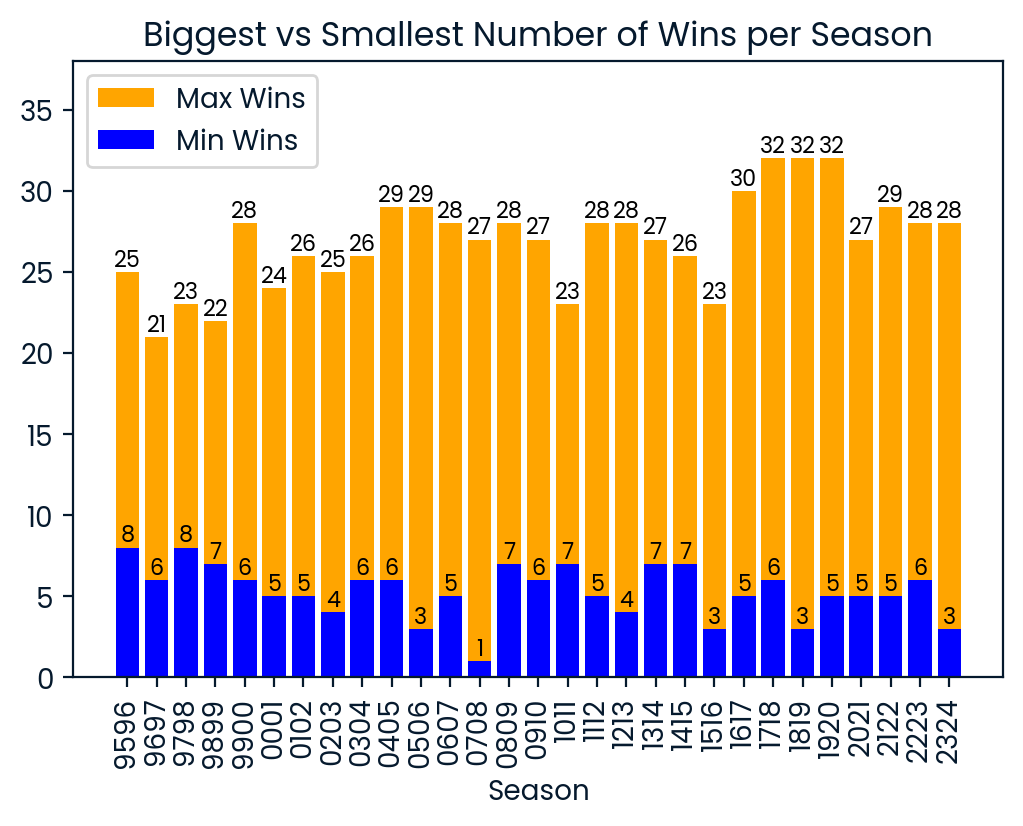

In [60]:
plt.figure(figsize=(6, 4))

bars_max = plt.bar(max_win.keys(), max_win.values(), color='orange', label='Max Wins')
bars_min = plt.bar(min_win.keys(), min_win.values(), color='blue', label='Min Wins')

ax = plt.gca()

for bars in [bars_max, bars_min]:  
    for bar in bars:
        ax.annotate(f'{int(bar.get_height())}', 
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')  
        
plt.ylim(0, 38)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("")
plt.title("Biggest vs Smallest Number of Wins per Season")

plt.legend()

plt.show()
plt.close()

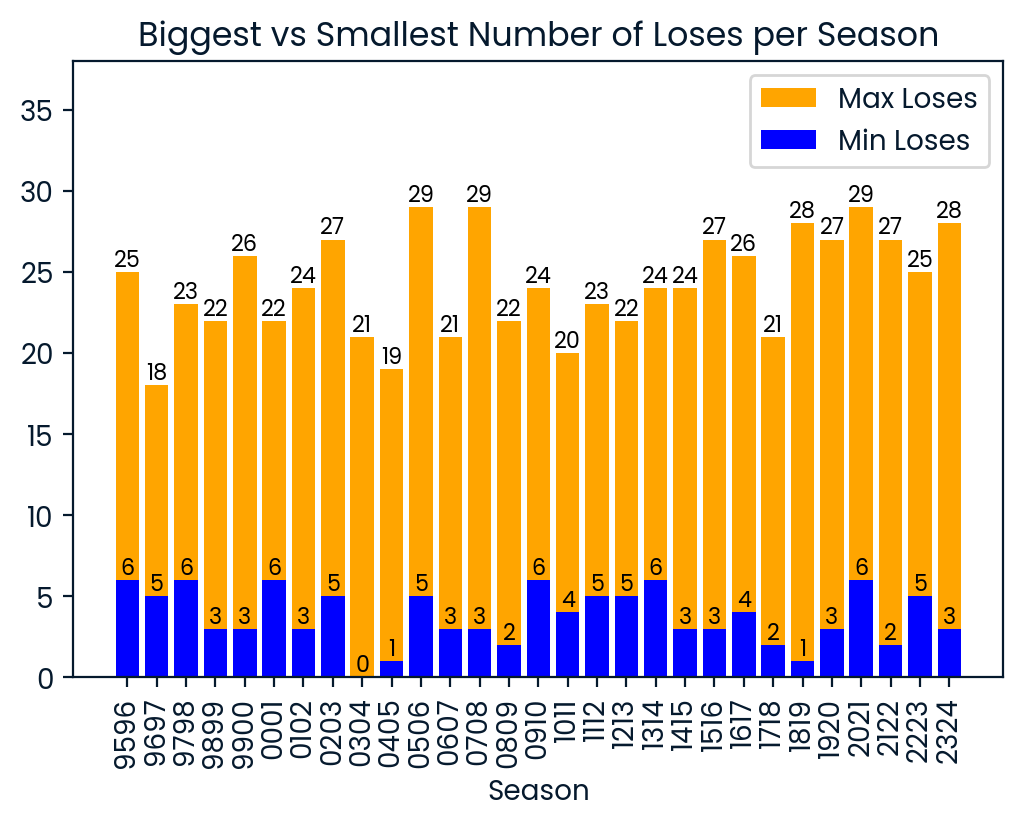

In [62]:
plt.figure(figsize=(6, 4))

bars_max = plt.bar(max_lose.keys(), max_lose.values(), color='orange', label='Max Loses')
bars_min = plt.bar(min_lose.keys(), min_lose.values(), color='blue', label='Min Loses')

ax = plt.gca()

for bars in [bars_max, bars_min]:  
    for bar in bars:
        ax.annotate(f'{int(bar.get_height())}', 
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')  
        
plt.ylim(0, 38)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("")
plt.title("Biggest vs Smallest Number of Loses per Season")

plt.legend()

plt.show()
plt.close()

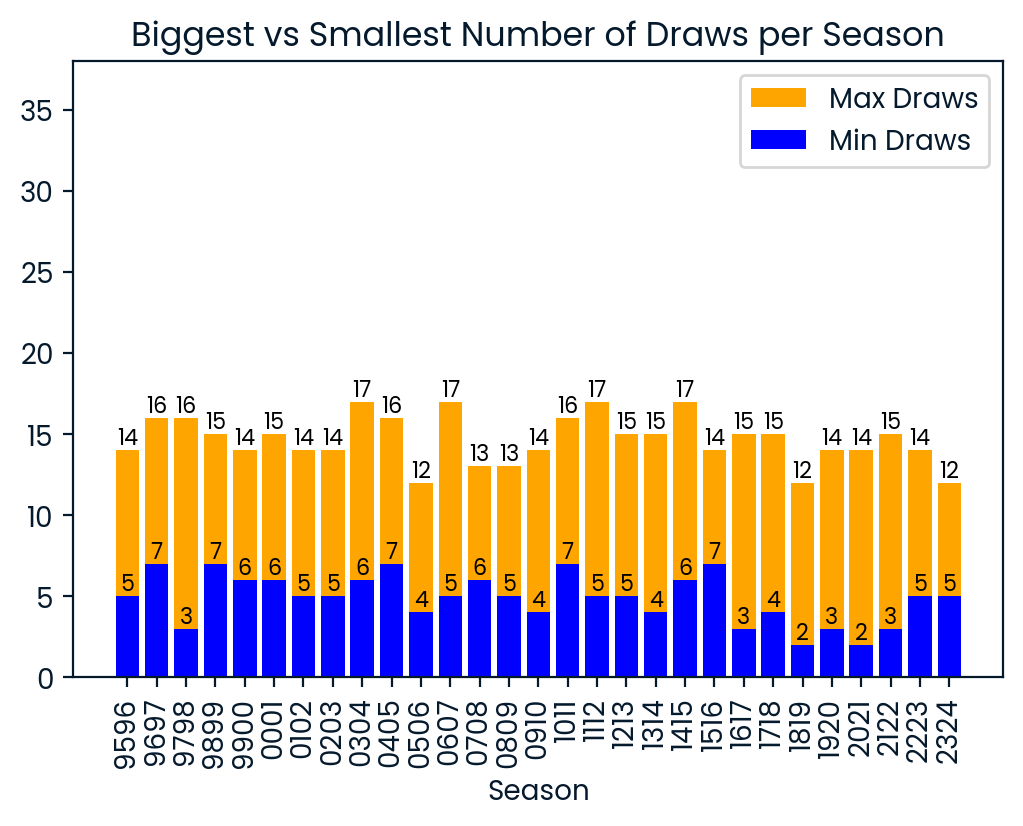

In [63]:
plt.figure(figsize=(6, 4))

bars_max = plt.bar(max_draw.keys(), max_draw.values(), color='orange', label='Max Draws')
bars_min = plt.bar(min_draw.keys(), min_draw.values(), color='blue', label='Min Draws')

ax = plt.gca()

for bars in [bars_max, bars_min]:  
    for bar in bars:
        ax.annotate(f'{int(bar.get_height())}', 
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')  
        
plt.ylim(0, 38)
plt.xticks(rotation=90)
plt.xlabel("Season")
plt.ylabel("")
plt.title("Biggest vs Smallest Number of Draws per Season")

plt.legend()

plt.show()
plt.close()